# Demo 1

This notebook demonstrates the usage of the iCE-NGM package for a 2D limit state function given by:

$$
g_1(x_1, x_2)=\min \left\{\begin{array}{c}0.1\left(x_1-x_2\right)^2-\frac{1}{\sqrt{2}}\left(x_1+x_2\right)+3 \\ 0.1\left(x_1-x_2\right)^2+\frac{1}{\sqrt{2}}\left(x_1+x_2\right)+3 \\ x_1-x_2+\frac{7}{\sqrt{2}} \\ x_2-x_1+\frac{7}{\sqrt{2}}\end{array}\right\}
$$

The reference failure probability is $2.2\times 10^{-3}$ and the number of failure modes is 4. This example is included in section 6.3 of our paper, which discusses two-dimensional examples. Further details can be found there.

## Initialization

In [1]:
""" Import packages and set random seed. """
# import packages
from src.limit_state_funcs import series_system
from src.iceais import *
# set random seed
np.random.seed(0)

""" Define the problem. """
# The input density function is a standard multivariate normal distribution.
input_density = GaussianMixtureDensity(p=2, K=1)
# set limit state function
limit_state_func = series_system
# true failure probability
pf_true = 0.0022227335

## iCE-NGM with fixed stopping criterion
We fit the iCE-NGM with fixed stopping criterion and estimate the failure probability with 3000 samples.

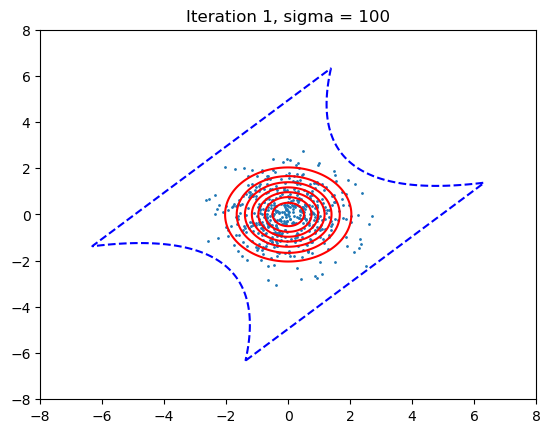

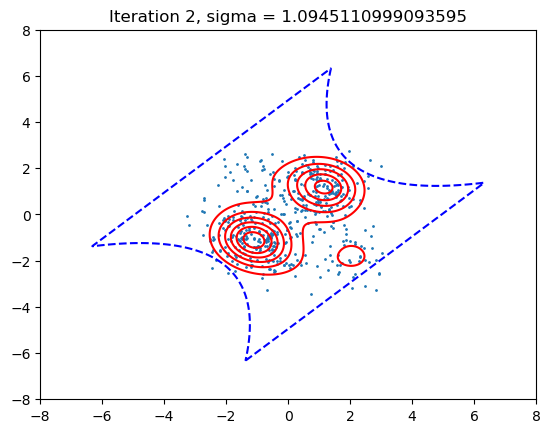

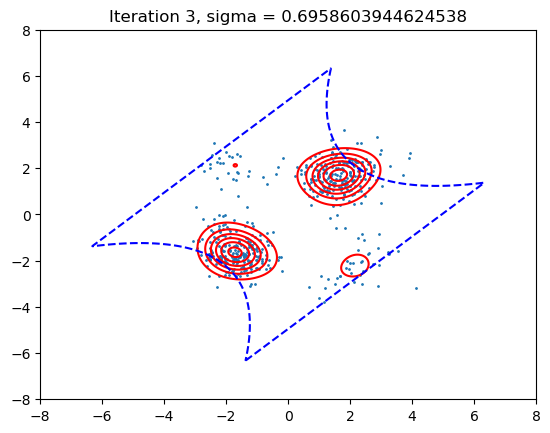

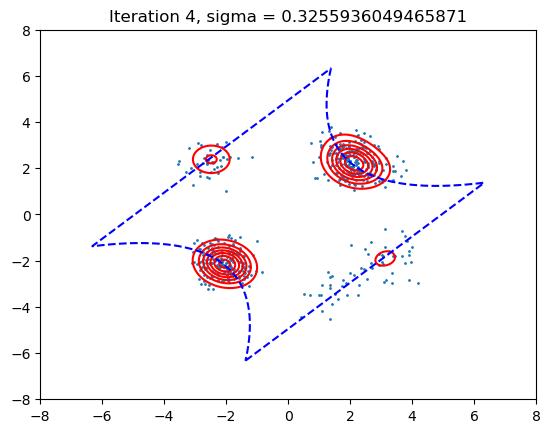

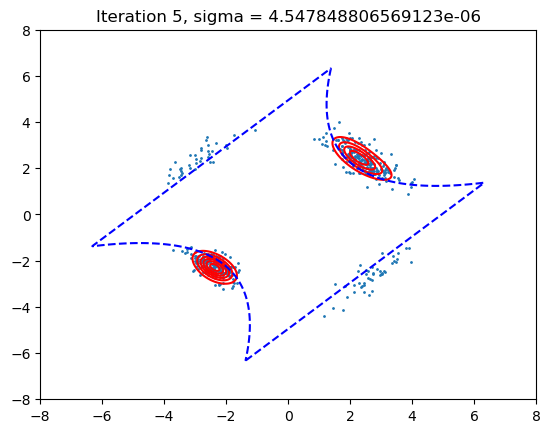

Converged after 5 iterations.


In [2]:
""" Fit iCE-NGM with fixed stopping criterion. """
ice_ngm = ImprovedCEAISNonparametricGaussianMixture(limit_state_func=limit_state_func, input_density=input_density)
# for NGM, delta_target is set to 0.6 since it is achievable. At each iteration, we plot the contour of the importance distribution and its samples.
ice_ngm.fit(max_iter=100, samples_per_level=500, delta_target=0.6, plot_process=True)

In [3]:
""" Predict the failure probability with N=3000 samples. """
pf_ngm = ice_ngm.predict(N=3000)
print(f"Failure probability estimated by iCE-NGM with fixed stopping criterion: {pf_ngm}")
print(f"Relative error: {(pf_ngm - pf_true) / pf_true}")

Failure probability estimated by iCE-NGM with fixed stopping criterion: 0.0022577267150594832
Relative error: 0.01574332463135294


## iCE-NGM with budget-informed stopping criterion
We fit the iCE-NGM with budget-informed stopping criterion and estimate the failure probability with remaining samples.

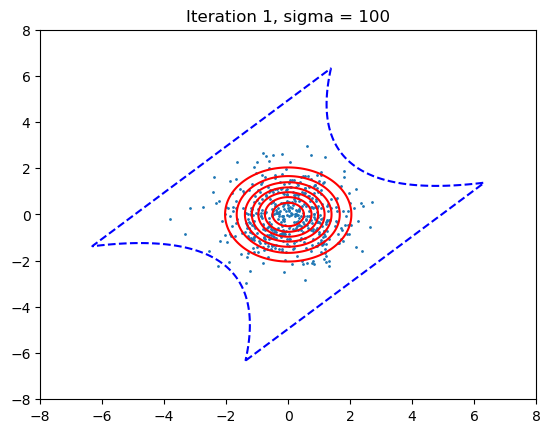

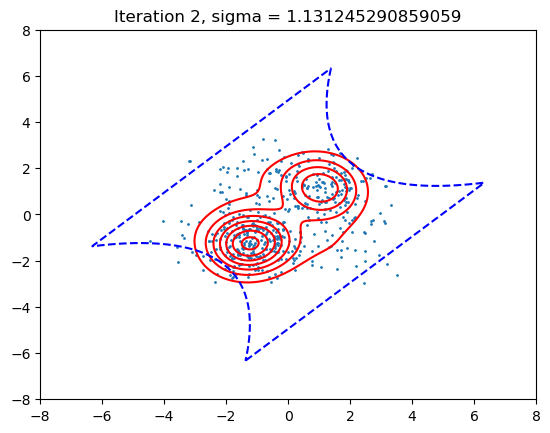

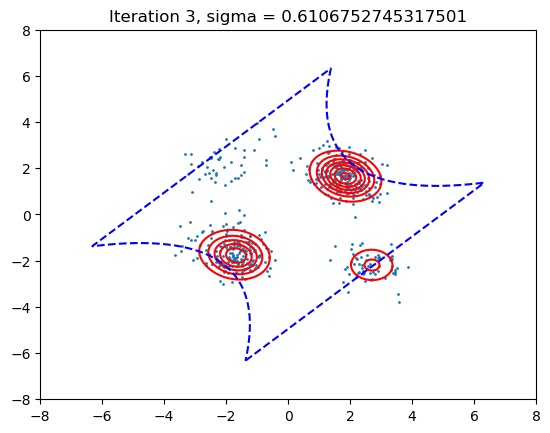

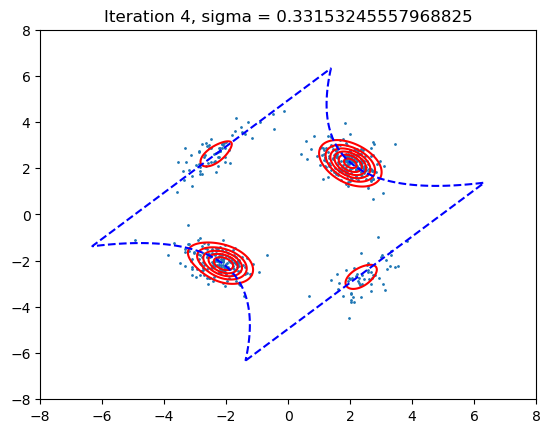

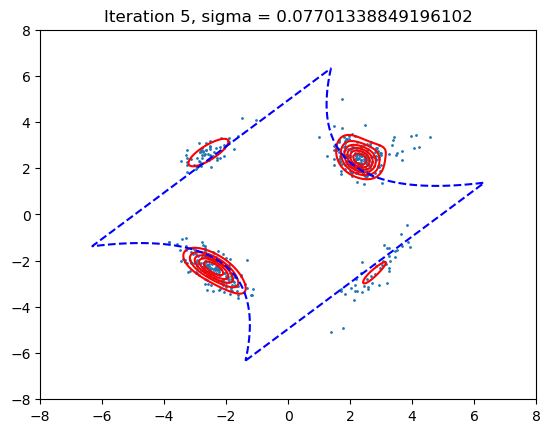

Converged after 5 iterations.


In [4]:
""" Fit iCE-NGM with budget-informed stopping criterion. """
ice_ngm_budget = ImprovedCEAISNonparametricGaussianMixture(limit_state_func=limit_state_func, input_density=input_density)
# total sample budget is set to 10000 and delta_upper_bound is set to 1 to prevent premature stopping. At each iteration, we plot the contour of the importance distribution and its samples.
ice_ngm_budget.fit_with_budget(max_iter=100, samples_per_level=500, sample_budget=int(1e4), plot_process=True,
                               delta_target=0, delta_upper_bound=1)

Failure probability estimated by iCE-NGM with budget-informed stopping criterion: 0.0022489170551293763
Relative error: 0.011779889550131147


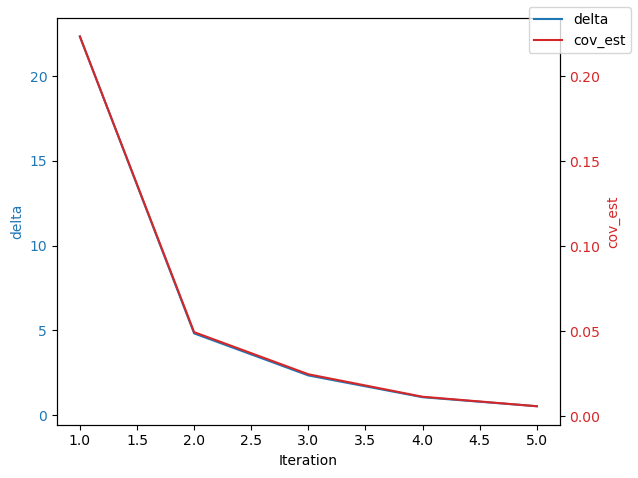

In [5]:
""" Predict the failure probability with remaining samples. """
pf_ngm_budget = ice_ngm_budget.predict_with_budget()
print(f"Failure probability estimated by iCE-NGM with budget-informed stopping criterion: {pf_ngm_budget}")
print(f"Relative error: {(pf_ngm_budget - pf_true) / pf_true}")
# plot the convergence process.
ice_ngm_budget.plot_convergence()